In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
import numpy as np
from numpy.linalg import svd
import cv2
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import logging

In [3]:
def compress_img(matrix,k,img_title):
    img=np.zeros(matrix.shape,dtype=matrix.dtype)
    if len(img.shape)==3:
        for c in range(img.shape[2]):
            U,s,V = svd(matrix[:,:,c], full_matrices=False)
            img[:,:,c]=np.dot(U[:,0:k],np.dot(np.diag(s[:k]),V[0:k,:]))
        logger = logging.getLogger()
        old_level = logger.level
        logger.setLevel(100)

        plt.figure(figsize=(8,8))
        plt.imshow(img)
        plt.title(img_title)
        plt.show()
        logger.setLevel(old_level)
    else:
        U,s,V = svd(matrix, full_matrices=False)
        img=np.dot(U[:,0:k],np.dot(np.diag(s[:k]),V[0:k,:]))
        logger = logging.getLogger()
        old_level = logger.level
        logger.setLevel(100)

        plt.figure(figsize=(8,8))
        plt.imshow(img, cmap='gray')
        plt.title(img_title)
        plt.show()
        logger.setLevel(old_level)
        
    

### Natural image 

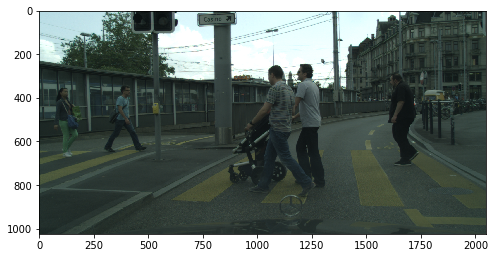

In [4]:
img_path = 'Data/Cityscapes/leftImg8bit/train/zurich/zurich_000002_000019_leftImg8bit.png'
plt.figure(figsize=(8,8))
img = plt.imread(img_path)
plt.imshow(img)
plt.show()

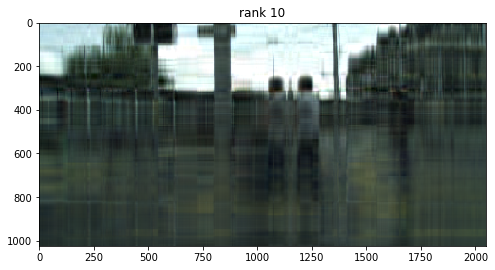

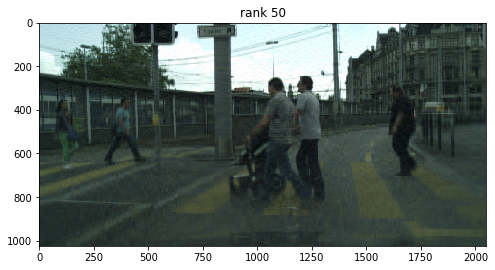

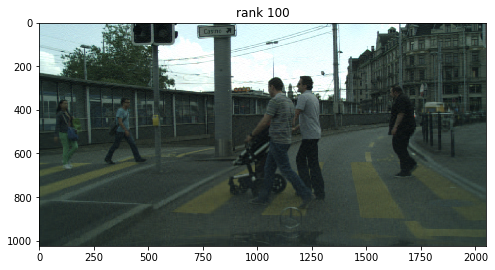

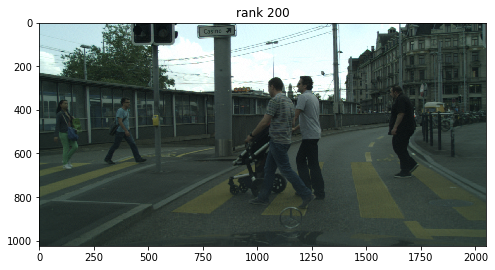

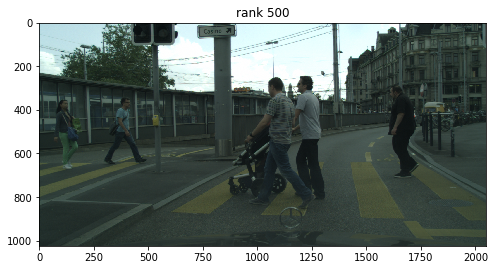

In [5]:
for rank in [10,50,100,200,500]:
    compress_img(img,rank,'rank {}'.format(rank))

### Melencolia: An Enigma for Half a Millennium

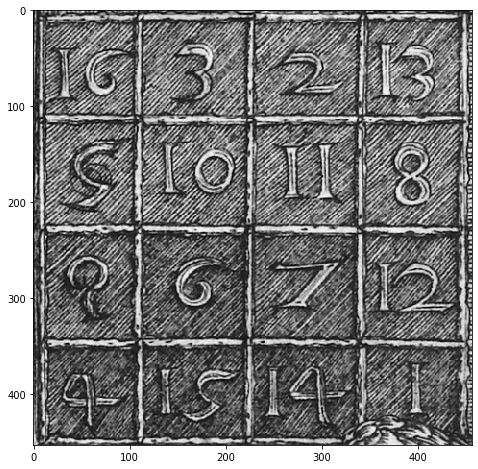

In [6]:
img_path = "Data/melancholia-magic-square.jpg"
plt.figure(figsize=(8,8))
img = plt.imread(img_path).astype('float')
plt.imshow(img,cmap='gray')
plt.show()

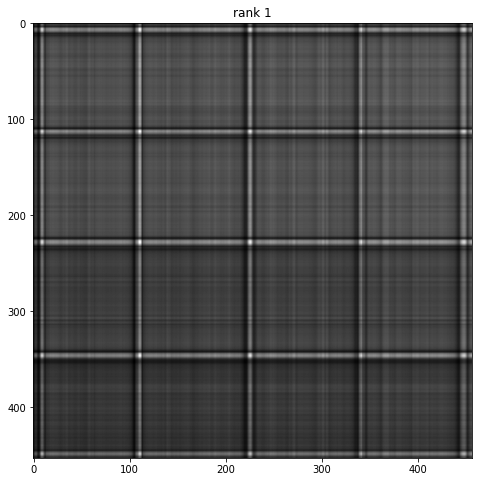

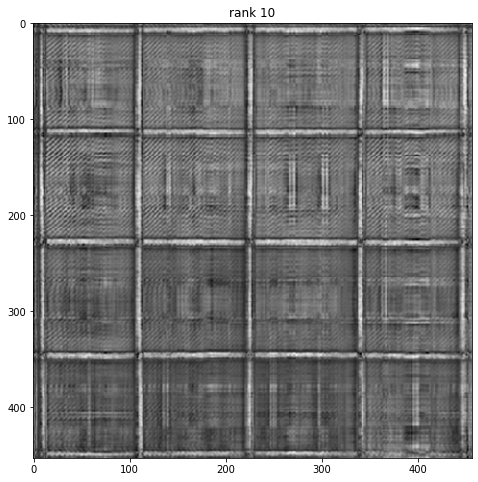

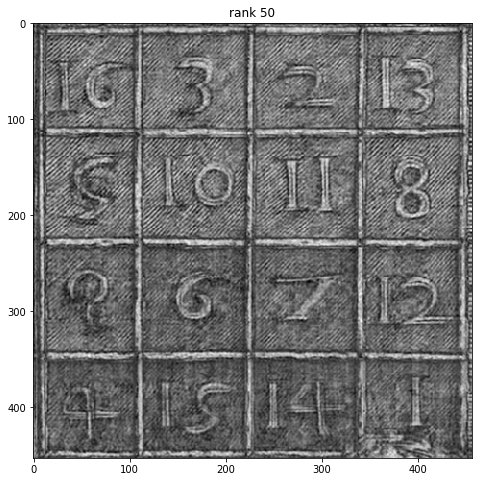

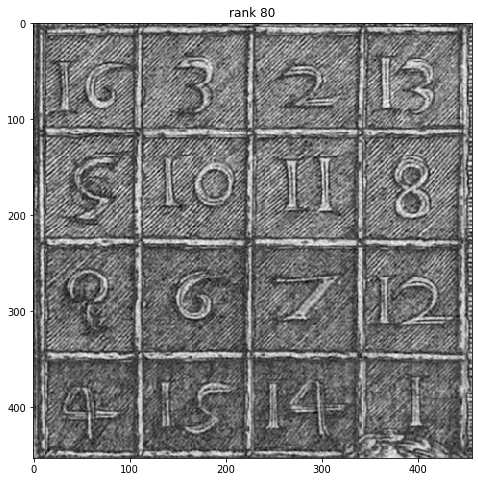

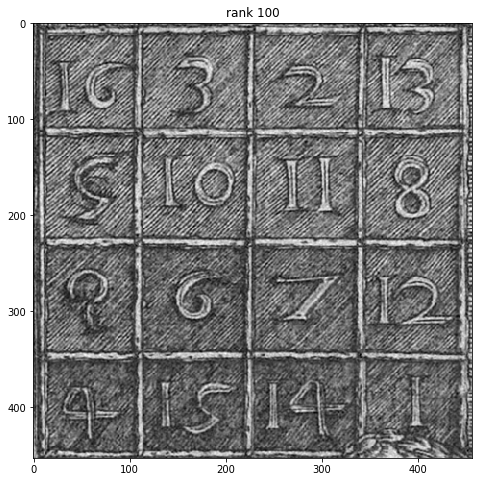

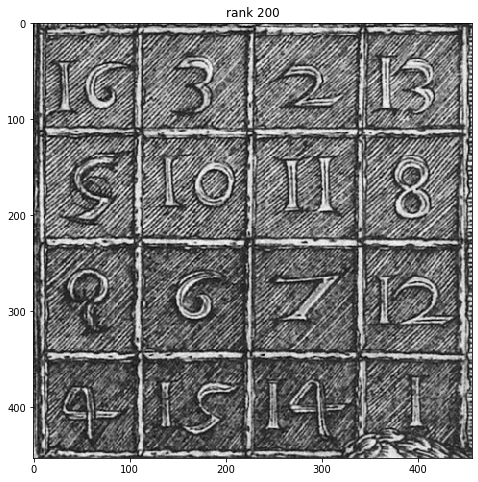

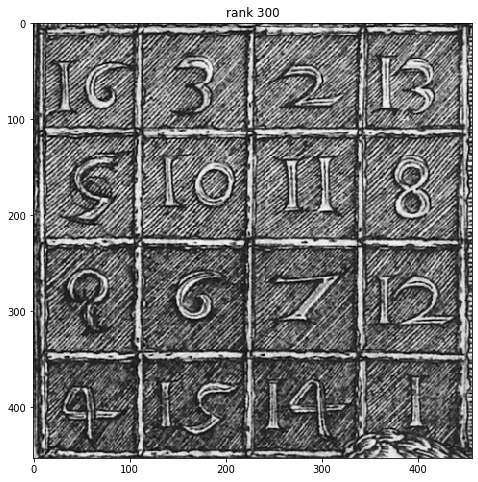

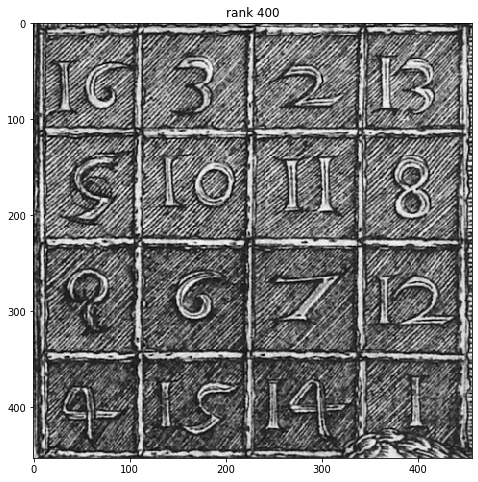

In [7]:
for rank in [1,10,50,80,100,200, 300, 400]:
    compress_img(img,rank,'rank {}'.format(rank))

In [19]:
pixel_values = np.zeros((500,50))
for i in range(500):
    x = np.random.choice(np.arange(0,400))
    y = np.random.choice(np.arange(0,400))
    pixel_values[i] = img[x,y:y+50]

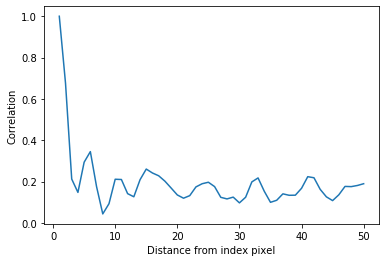

In [20]:
corr_pixels=np.zeros(50)
for i in range(50):
    corr_pixels[i] = np.corrcoef(pixel_values[:,0],pixel_values[:,i])[1,0]
plt.plot(range(1,51),corr_pixels)
plt.xlabel('Distance from index pixel')
plt.ylabel('Correlation')
plt.show()